## **Question 1**

## **A. Stochastic Gradient Descent+ Momentum (SGD+ Momentum)**

SGD formula is shown below.

In this formula theta is a vector of weights and biases of our model.

Alpha is the learning rate.

J(Θ) is our loss function.

The ∇ is Symbol of gradiant.

This formula shows that how the model updates its weight and biases.


$$\theta = \theta - \alpha. \nabla_{\theta} J(\theta) $$

**Problem of SGD**

The problem is that alpha is a hyper parameter so if alpha set to a low value it may stuck in local minimum. And if alpha set to a higher value it might never reach the global minimum and just oscillates around Global minimum.

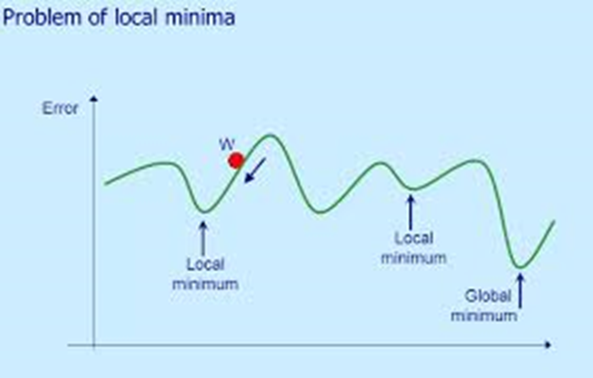

Source: Towards Data Science site

## **Solution of SGD problem: Adding Momentum**

It solves above problems by adding a fraction of the last update to current update and using momentom prevents overshooting and oscillating.

You can see the picture that shows this below.

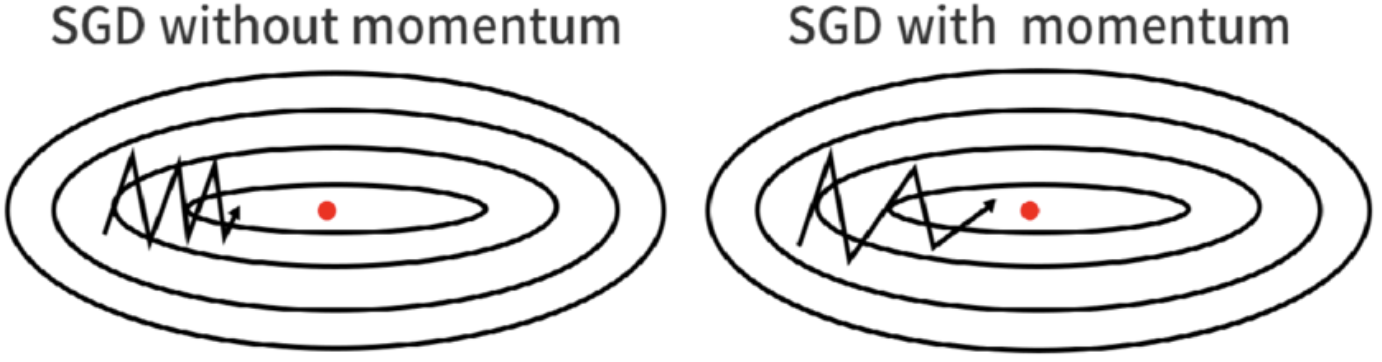
Scource: https://paperswithcode.com

##**Formula of SGD + Momentum:**
In this formula, v is our update (momentum) and as the furmula shows it's the result of adding a fraction of last momentum to the normal SGD (without momentum) update. And our new theta is theta minus momentum. 𝛄 is a hyper parameter that controls the effect of momentum of last updates to this update. η is as same as α in SGD without momentum formula.

$$v_t = \gamma v_{t-1} + \eta \nabla_{\theta} J(\theta) $$
$$\theta = \theta - v_t$$

##**B.Adaptive gradients(AdaGrad):**

The idea is that when we use SGD we set a value to learning rate (α or η) and we don't change it so as we saw in upper part it can cause some problems. So in this optimization we update this parameter so in higher slopes to be higher to go faster and in lower slopes reduce it to be lower and stay in the minimum spot.

##**How Adagrad works:**
It updates learning rate by using historical information of function gradient. It acctualy changes the weight and biases of a rare occur features more than the frequently occur features in our samples. So it helps faster optimization.

##**Adagrad formula:**
As you can see the fraction of gradient is changing in each steps and alpha has the history of gradients in each step. g is the gradient of the loss function and we square it and it's added to square of perivious gradiant so alpha has the history of loss function in itself. The initial value of α is 0 and the ϵ is a very low value that prevents devide by zero (10^-8 = ϵ).

$$ \alpha_t  = \alpha_{t-1} + g_t^2$$


$$\theta_{t+1} = \theta_t - \frac {\eta}{\sqrt{\epsilon + \alpha_t}}*\nabla_{\theta} J_t(\theta) $$

##**C.Root Mean Square Propagation(RMSprop):**



The idea is that when we are updating the fraction of loss function gradient in AdaGrad, the effect of all time gradients are the same but most of the time the effect of recent information is much more important for us and these effects leads us to the minimum of loss function. So we want to do something that the new gradients effect more than older ones. That's what is happening in this optimizer.

##**RMSprop formula:**

As you can see below the update formula for theta doesn't change but the update of alpha has been changed. Beta is a hyper parameter that determines the effect of last square of gradients on our update and it prevents that the fraction of gradient in updating theta formula become zero by making the effect of previous gradient of loss function, less and the new one's effect higher. I will disscuss why it works better than the AdaGrad algorithm in question 2.

**Note:** Beta is set to something between 0 and 1 (usually 0.9)

$$ \alpha_t  = \beta\alpha_{t-1} + (1 - \beta)g_t^2$$

$$\theta_{t+1} = \theta_t - \frac {\eta}{\sqrt{\epsilon + \alpha_t}}*\nabla_{\theta} J_t(\theta) $$

##**Why that formula works**
As you can see in the lower formulas the alpha is equal to a sigma of beta to the power of t-i, multiply gradient_i. So because of the Beta range (0 to 1) when the i is lower it's effect would be very low and when it's higher it has more effect on alpha.  

$\alpha_{t} = \beta \alpha_{t-1} + (1 - \beta) g_{t}^2$

$\alpha_{t} = \beta (\beta \alpha_{t-2} + (1 - \beta)g_{t-1}^2) + (1 - \beta)g_{t}^2 = \beta^2 \alpha_{t-2} + (1 - \beta)\beta g_{t-1}^2 + (1 - \beta)g_{t}^2$

$\alpha_{t} = \beta^2 (\beta \alpha_{t-3} + (1 - \beta)g_{t-2}^2) + (1 - \beta)\beta g_{t-1}^2 + (1 - \beta)g_{t}^2 = \beta^3 \alpha_{t-3} + (1 - \beta)\beta^2 g_{t-2}^2 + (1 - \beta)\beta g_{t-1}^2 + (1 - \beta)g_{t}^2$


$\alpha_{t} = (1 - \beta)\sum^{t}_{i = 1} \beta^{t-i} g_{i}^2$

##**Question 2**

##**A.SGD + Momentum**
*  Advantage: Adding momentun will help to converge faster and the model trains faster. It also prevents to stuck at local minimum and leads to global minimum by momentum.

* Disadvantage: It adds another hyper parameter and its hard to set a good value for hyper parameters(there is also a learning rate that is hyper parameter too). It also may overshoot a little and oscillate around the global minimum before it stablize at the minimum.


##**B.Adagrad**

*  Advantage: It will adaptively choose the learning rate by a history of loss function gradients and it means less manual tuning. Because of making the learning rate, less so it prevents overshooting and the probability of it becomes less.
*  Disadvantages: The learning rate would be very small and may become zero in last iterations.

##**C.RMSprop**

*  Advantage: At first it handle the Adagrad problem with focussing on resent gradients and vanishing the effect of old ones. It handles adaptive learning rate for each parameter with the recent gradients of loss function. At the end I should mention that it converges faster than other optimizations.

* Disadvantages: Because it won't lead the learning rate to zero, if the learning rate is large it can cause overshooting.

## **Question 3**
## Imbalanced Dataset:

Sometimes in training data we encounter an imbalanced dataset. That means one class has fewer instances than others. We call this class, minority class. This problem will leads to suboptimal performance in our machine learning/deep learning models. SMOTE algorithm is a solution to this problem

##SMOTE algorithm:
In this algorithm we oversample the minority class by creating synthetic examples. It means we create extra training data by doing some operations on real ones. The idea of creating synthetic samples is that for each minority samples we get all of **k** nearest neigbors (KNN). Depending upon the amount of over-sampling required, neigbors from KNN are randomly chosen. Then for the each couple of random neighbor and instance under consideration, SMOTE algorithm will make a synthetic sample on the connecting line of two instances by folloing procedure:

1. Take the difference between the feature vector (sample) under consideration and its nearest neighbor.

2. Multiply this difference by a random number between 0 and 1 and add it to the feature vector under consideration.

It will select random point along the line connecting line between two specific samples and it's our synthetic data.

**Note**: This approach effectively forces the decision region of the minority class to become more general.

**Source: Nitesh , V., Kevin, W., Lawrence, O., & W.Philip. SMOTE: Synthetic Minority Over-samoling Technique. Journal of Artificial Intelligence Research 16 (2002) 321-357**

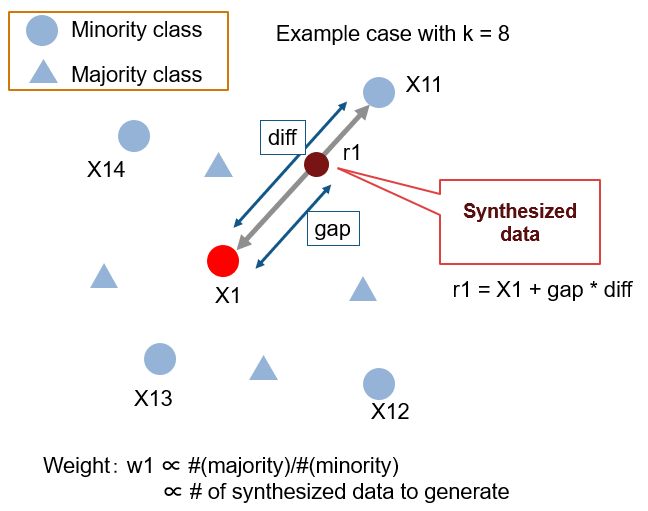

Source: Github

##**Disadvantages**
The main disadvantage of this algorithm is that it make additional noise in data. The picture below will show that better.

The other disadvantage is that it's unusable for high dimensional data because of its complexity in computation and it may create synthetic data that is not following the true sample disturbution

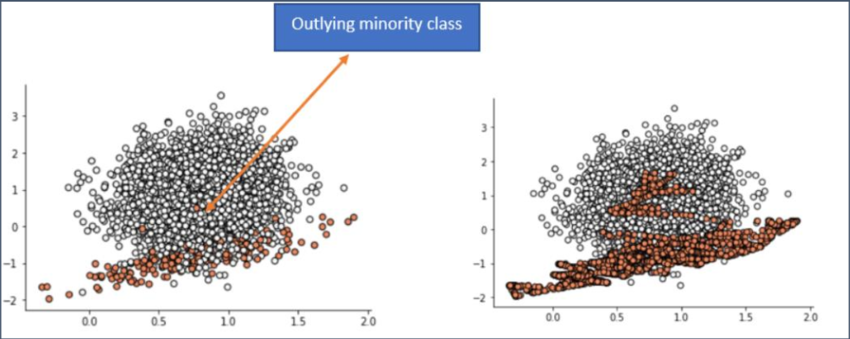

Source: https://www.researchgate.net

##Example:
In next coding block I used the assignment dataset. At first I trained my model without SMOTE algorithm and then I used SMOTE algorithm and trained again. I will explain each bloke before the bloke.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/assignment1-AI/Assignment-1-Dataset.csv"
data = pd.read_csv(data_path)
data.describe()

Mounted at /content/drive


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F86,F87,F88,F89,F90,F91,F92,Target,Unnamed: 93,Unnamed: 94
count,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,1.113040e+05,111304.000000,...,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,0.0,0.0
mean,1.384011,16.234637,1.141181,109.371424,1.678242,4.501159,0.116312,0.031535,3.779658e+06,38.706920,...,32.613482,63.606753,4096.888638,1.325262,13.327666,32.536432,1.247233,0.811660,NaN,NaN
std,0.486584,13.833192,1.729046,119.132927,0.467153,1.828697,1.364295,0.574920,2.086547e+08,47.314877,...,25.041610,2.130230,2210.531994,1.848414,8.912911,25.294460,0.971636,0.896797,NaN,NaN
min,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,...,0.000000,61.000000,1403.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN
25%,1.000000,6.000000,0.000000,26.000000,1.000000,4.000000,0.000000,0.000000,0.000000e+00,10.000000,...,24.000000,61.000000,1416.000000,0.000000,0.000000,23.000000,1.000000,0.000000,NaN,NaN
50%,1.000000,7.000000,0.000000,50.000000,2.000000,4.000000,0.000000,0.000000,0.000000e+00,22.000000,...,36.000000,63.000000,3454.000000,0.000000,18.000000,36.000000,1.000000,0.000000,NaN,NaN
75%,2.000000,27.000000,2.000000,170.000000,2.000000,6.000000,0.000000,0.000000,0.000000e+00,48.000000,...,36.000000,66.000000,6444.000000,4.000000,18.000000,36.000000,1.000000,2.000000,NaN,NaN
max,4.000000,44.000000,6.000000,932.000000,2.000000,8.000000,88.000000,50.000000,3.889600e+10,332.000000,...,300.000000,70.000000,9960.000000,7.000000,36.000000,300.000000,87.000000,2.000000,NaN,NaN


Before training the model I did some preproccessing. As you can see X is setted to the features by droping unneccessary data and y is setted to target values. After that I made a nural network model that is going to be the nural network that is under examine by using regular data and the resampled data by SMOTE algorithm.

In [ ]:
X = data.drop('Target', axis = 1)
X = X.drop('Unnamed: 93', axis = 1)
X = X.drop('Unnamed: 94', axis = 1)
y = data['Target']

from imblearn.over_sampling import SMOTE
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(92,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])





In two next blokes I splitted my data to train and test data. After that I used the train data to train my model and after that I evaluated my model by test data. I will use the result of evaluation at the end.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In this bloke I checked if the classes need to be resampled by SMOTE algorithm or not, by finding the number of samples of each class. In other language I am checking if the data is imbalanced or not

In [ ]:
print(data['Target'].value_counts())

Target
0    57213
2    36250
1    17841
Name: count, dtype: int64


As the result of last shows, the data is imbalanced so we can balance it with SMOTE algorithm.

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
model1.compile(optimizer="Adam", loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model1.fit(X_train, y_train, epochs=300, batch_size=300, verbose=1,
                    validation_split = 0.1)
regular_test_loss, regular_test_accuracy = model1.evaluate(X_test, y_test)


Epoch 1/300
268/268 [==============================] - 7s 6ms/step - loss: 0.8109 - accuracy: 0.5955 - val_loss: 0.7402 - val_accuracy: 0.6355
Epoch 2/300
268/268 [==============================] - 1s 5ms/step - loss: 0.7274 - accuracy: 0.6350 - val_loss: 0.7085 - val_accuracy: 0.6514
Epoch 3/300
268/268 [==============================] - 2s 7ms/step - loss: 0.7068 - accuracy: 0.6478 - val_loss: 0.7035 - val_accuracy: 0.6495
Epoch 4/300
268/268 [==============================] - 2s 7ms/step - loss: 0.6931 - accuracy: 0.6551 - val_loss: 0.6950 - val_accuracy: 0.6515
Epoch 5/300
268/268 [==============================] - 1s 6ms/step - loss: 0.6846 - accuracy: 0.6592 - val_loss: 0.6809 - val_accuracy: 0.6628
Epoch 6/300
268/268 [==============================] - 2s 6ms/step - loss: 0.6759 - accuracy: 0.6643 - val_loss: 0.6776 - val_accuracy: 0.6649
Epoch 7/300
268/268 [==============================] - 2s 7ms/step - loss: 0.6710 - accuracy: 0.6665 - val_loss: 0.6752 - val_accuracy: 0.6652

Next bloke shows that the train data is balanced now.

In [ ]:
train_data = pd.DataFrame(X_train_resampled)
train_data['Target'] = y_train_resampled

print(train_data['Target'].value_counts())

Target
2    45709
0    45709
1    45709
Name: count, dtype: int64


As you can see the train data is now balaced so we are going to train our model again but this time with a balanced data. Then we evaluate it with test data.

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(92,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model2.compile(optimizer="Adam", loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model2.fit(X_train_resampled, y_train_resampled, epochs=300, batch_size=300, verbose=1,
                    validation_split = 0.1)
SMOTE_test_loss, SMOTE_test_accuracy = model2.evaluate(X_test, y_test)

Epoch 1/300
412/412 [==============================] - 7s 6ms/step - loss: 0.7377 - accuracy: 0.6523 - val_loss: 0.8889 - val_accuracy: 0.5996
Epoch 2/300
412/412 [==============================] - 2s 5ms/step - loss: 0.6659 - accuracy: 0.6848 - val_loss: 0.8073 - val_accuracy: 0.6570
Epoch 3/300
412/412 [==============================] - 2s 5ms/step - loss: 0.6487 - accuracy: 0.6927 - val_loss: 0.8366 - val_accuracy: 0.5412
Epoch 4/300
412/412 [==============================] - 3s 7ms/step - loss: 0.6369 - accuracy: 0.6988 - val_loss: 0.8514 - val_accuracy: 0.5407
Epoch 5/300
412/412 [==============================] - 3s 6ms/step - loss: 0.6279 - accuracy: 0.7041 - val_loss: 0.8257 - val_accuracy: 0.5813
Epoch 6/300
412/412 [==============================] - 2s 6ms/step - loss: 0.6211 - accuracy: 0.7086 - val_loss: 0.8368 - val_accuracy: 0.5163
Epoch 7/300
412/412 [==============================] - 2s 5ms/step - loss: 0.6143 - accuracy: 0.7112 - val_loss: 0.7762 - val_accuracy: 0.6094

Now we can compare the result of using SMOTE algorithm to using an imbalanced data for training. In next bloke we will do that.

In [ ]:
print(f"the accuracy without SMOTE algorithm is {regular_test_accuracy} and the loss is {regular_test_loss}")
print(f"the accuracy with SMOTE algorithm is {SMOTE_test_accuracy} and the loss is {SMOTE_test_loss}")

the accuracy without SMOTE algorithm is 0.6873006820678711 and the loss is 0.6915367245674133
the accuracy with SMOTE algorithm is 0.6648398637771606 and the loss is 0.7438147664070129


In [ ]:
Minority_class = data['Target'].value_counts().idxmin()
X_test_label_less = X_test[y_test == Minority_class]
y_test_label_less = y_test[y_test == Minority_class]
regular_test_loss, regular_test_accuracy = model1.evaluate(X_test_label_less, y_test_label_less)
SMOTE_test_loss,SMOTE_test_accuracy = model2.evaluate(X_test_label_less, y_test_label_less)
print(f"regular accuracy: {regular_test_accuracy} and SMOTE accuracy: {SMOTE_test_accuracy}")

112/112 [==============================] - 0s 2ms/step - loss: 0.7715 - accuracy: 0.8366
regular accuracy: 0.6302708983421326 and SMOTE accuracy: 0.8366377949714661


##**Conclusion:**
As you can see the deep nural network that is trained by imbalanced data doesn't work good for minority class but when you train with balanced data it performs better in distinguishing the minority class.

The reason that the total accuracy of second model is a little bit less than other one I think is because of noisy data that we are making by SMOTE algorithm that's why in the main paper of SMOTE algorithm says that this algorithm works better if we combine it with undersampling of majority class. It works better because the SMOTE algorithm makes less synthetic data to equalize samples of minority class to majority class and it results in less noise.

##**QUESTION 4**


At first I read the data from dataset.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/assignment1-AI/Assignment-1-Dataset.csv"
data = pd.read_csv(data_path)
data.describe()

Mounted at /content/drive


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F86,F87,F88,F89,F90,F91,F92,Target,Unnamed: 93,Unnamed: 94
count,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,1.113040e+05,111304.000000,...,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,0.0,0.0
mean,1.384011,16.234637,1.141181,109.371424,1.678242,4.501159,0.116312,0.031535,3.779658e+06,38.706920,...,32.613482,63.606753,4096.888638,1.325262,13.327666,32.536432,1.247233,0.811660,NaN,NaN
std,0.486584,13.833192,1.729046,119.132927,0.467153,1.828697,1.364295,0.574920,2.086547e+08,47.314877,...,25.041610,2.130230,2210.531994,1.848414,8.912911,25.294460,0.971636,0.896797,NaN,NaN
min,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,...,0.000000,61.000000,1403.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN
25%,1.000000,6.000000,0.000000,26.000000,1.000000,4.000000,0.000000,0.000000,0.000000e+00,10.000000,...,24.000000,61.000000,1416.000000,0.000000,0.000000,23.000000,1.000000,0.000000,NaN,NaN
50%,1.000000,7.000000,0.000000,50.000000,2.000000,4.000000,0.000000,0.000000,0.000000e+00,22.000000,...,36.000000,63.000000,3454.000000,0.000000,18.000000,36.000000,1.000000,0.000000,NaN,NaN
75%,2.000000,27.000000,2.000000,170.000000,2.000000,6.000000,0.000000,0.000000,0.000000e+00,48.000000,...,36.000000,66.000000,6444.000000,4.000000,18.000000,36.000000,1.000000,2.000000,NaN,NaN
max,4.000000,44.000000,6.000000,932.000000,2.000000,8.000000,88.000000,50.000000,3.889600e+10,332.000000,...,300.000000,70.000000,9960.000000,7.000000,36.000000,300.000000,87.000000,2.000000,NaN,NaN


Then in this bloke I did some preproccessing. I droped unneccary data for X and setted it to features and y is setted to Target then I use Standard Scaler to scale X and then I splitted data to train and test data. After that as we saw in last question, the data is imbalanced so I used SMOTE to balance the train data.

In [ ]:
X = data.drop('Target', axis = 1)
X = X.drop('Unnamed: 93', axis = 1)
X = X.drop('Unnamed: 94', axis = 1)
y = data['Target']

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In this bloke I made a classification model employing a deep nural network. Then I used the Adagrad optimizer to train my model. Then I trained the model and after that I evaluated it with test data and print the result of that.

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(92,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])


optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01, epsilon=1e-7)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train_resampled, y_train_resampled, epochs=300, batch_size=1000, verbose=1,
                    validation_split = 0.1)

adagrad_test_loss, adagrad_test_accuracy = model.evaluate(X_test, y_test)

print(f"With Adagrad, loss is {adagrad_test_loss} and accuracy is {adagrad_test_accuracy}")

Epoch 1/300
124/124 [==============================] - 4s 18ms/step - loss: 0.9028 - accuracy: 0.5722 - val_loss: 1.1114 - val_accuracy: 0.1926
Epoch 2/300
124/124 [==============================] - 1s 10ms/step - loss: 0.7702 - accuracy: 0.6362 - val_loss: 1.0733 - val_accuracy: 0.2855
Epoch 3/300
124/124 [==============================] - 1s 11ms/step - loss: 0.7387 - accuracy: 0.6514 - val_loss: 1.0206 - val_accuracy: 0.3990
Epoch 4/300
124/124 [==============================] - 2s 17ms/step - loss: 0.7210 - accuracy: 0.6578 - val_loss: 0.9890 - val_accuracy: 0.4410
Epoch 5/300
124/124 [==============================] - 2s 18ms/step - loss: 0.7090 - accuracy: 0.6662 - val_loss: 0.9637 - val_accuracy: 0.4858
Epoch 6/300
124/124 [==============================] - 2s 13ms/step - loss: 0.7030 - accuracy: 0.6679 - val_loss: 0.9369 - val_accuracy: 0.5094
Epoch 7/300
124/124 [==============================] - 1s 10ms/step - loss: 0.6947 - accuracy: 0.6734 - val_loss: 0.9531 - val_accuracy:

In this bloke as the question said, I plotted the loss and accuracy for training and validation.

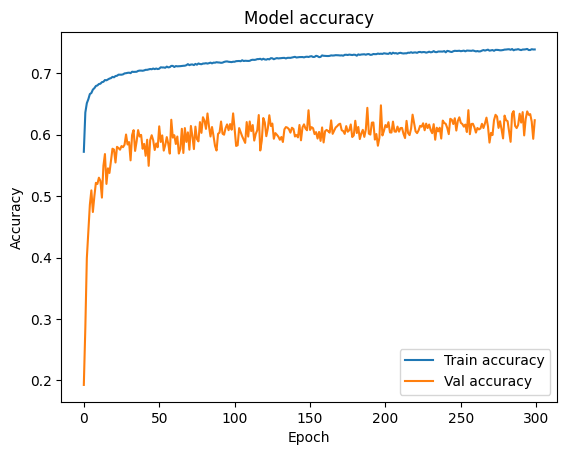

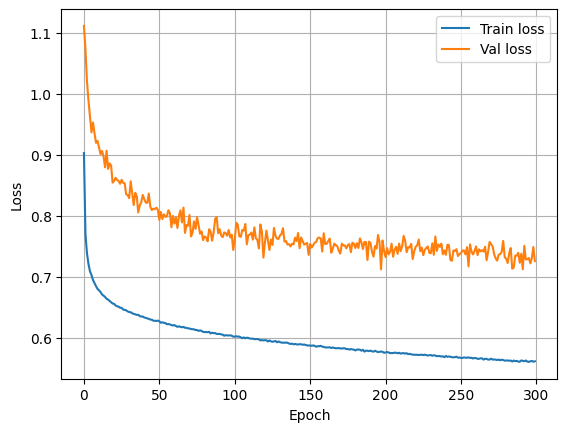

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Val accuracy'], loc='lower right')
plt.show()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In the next bloke I used the same model but this time I changed the optimizer to RMSprop. Then I compiled it again and trained it with the resampled data. Then I evaluated the model by test data.

**Note:** At the end of coding blokes I compared the result of training with each optimizer.

In [ ]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(92,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])


optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train_resampled, y_train_resampled, epochs=300, batch_size=1000, verbose=1,
                    validation_split = 0.1)

RMSprop_test_loss, RMSprop_test_accuracy = model.evaluate(X_test, y_test)

print(f"With RMSprop, loss is {RMSprop_test_loss} and accuracy is {RMSprop_test_accuracy}")

Epoch 1/300
124/124 [==============================] - 3s 12ms/step - loss: 0.7825 - accuracy: 0.6317 - val_loss: 0.8703 - val_accuracy: 0.5797
Epoch 2/300
124/124 [==============================] - 1s 10ms/step - loss: 0.6900 - accuracy: 0.6749 - val_loss: 0.9415 - val_accuracy: 0.5778
Epoch 3/300
124/124 [==============================] - 1s 10ms/step - loss: 0.6664 - accuracy: 0.6870 - val_loss: 0.9470 - val_accuracy: 0.5764
Epoch 4/300
124/124 [==============================] - 1s 10ms/step - loss: 0.6537 - accuracy: 0.6927 - val_loss: 0.9469 - val_accuracy: 0.4809
Epoch 5/300
124/124 [==============================] - 2s 15ms/step - loss: 0.6435 - accuracy: 0.6973 - val_loss: 0.9061 - val_accuracy: 0.5016
Epoch 6/300
124/124 [==============================] - 2s 17ms/step - loss: 0.6353 - accuracy: 0.7030 - val_loss: 0.8992 - val_accuracy: 0.4911
Epoch 7/300
124/124 [==============================] - 1s 11ms/step - loss: 0.6288 - accuracy: 0.7066 - val_loss: 0.8995 - val_accuracy:

And again as the question said I plot the accuracy and loss for the training and validation.

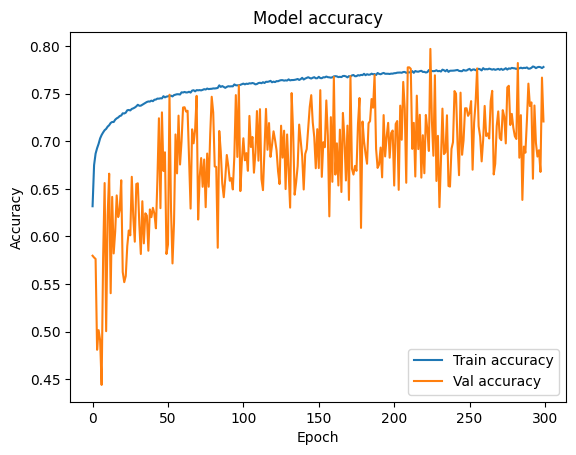

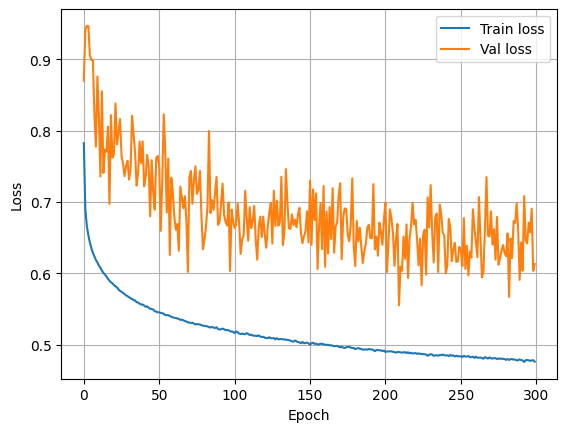

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Val accuracy'], loc='lower right')
plt.show()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)